In [2]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation
from scipy.signal import savgol_filter #Smo oth
import math
from math import dist
import time

import cv2

import random
from IPython import display
# aka import ipympl




# Function

In [3]:
def fig_pre_def(figsize_x=8, figsize_y=6,fontsize=18):
    plt.rc('font', family='Helvetica')         # 自型
    plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度
    return plt.figure(figsize=(figsize_x,figsize_y)) 

In [4]:
def fig_post_def(x_ma=None, x_mi=None, y_ma=None, y_mi=None, 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None):
    if x_ma or x_mi != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(x_ma))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(x_mi))    
    if y_ma or y_mi != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(y_ma))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(y_mi))
    
    ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=18)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=18)
    plt.legend(fontsize=18)

# Read File

In [6]:
folder = "processed_TOF_data/D200cm_d1cm_320ns_Threshold_35_35/"
neutron_signal_1  =np.loadtxt(folder+"20220129_TOF_TH3535_D200d1cm_40mins.txt")
neutron_signal_2  =np.loadtxt(folder+"20220129AmBe_TH3535_HV1550_D200cmd1cm_320ns_6hrs_2.txt") # 6hours
neutron_signal_3  =np.loadtxt(folder+"20220129AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_4  =np.loadtxt(folder+"20220130AmBe_TH3535_HV1550_D200cmd1cm_320ns_6hrs.txt")
neutron_signal_5  =np.loadtxt(folder+"20220130AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_6  =np.loadtxt(folder+"20220131AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_7  =np.loadtxt(folder+"20220131AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs_2.txt")
neutron_signal_8  =np.loadtxt(folder+"20220201AmBe_TH3535_HV1550_D200cmd1cm_320ns_8hrs.txt")
neutron_signal_9  =np.loadtxt(folder+"20220201AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_10  =np.loadtxt(folder+"20220202AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_11  =np.loadtxt(folder+"20220202AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs_2.txt")
neutron_signal_12  =np.loadtxt(folder+"20220204AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_13  =np.loadtxt(folder+"20220204AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs_2.txt")
neutron_signal_14  =np.loadtxt(folder+"20220205AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_15  =np.loadtxt(folder+"20220206AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_16  =np.loadtxt(folder+"20220207AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_17  =np.loadtxt(folder+"20220208AmBe_TH3535_HV1550_D200cmd1cm_320ns_12hrs.txt")
neutron_signal_18  =np.loadtxt(folder+"20220208AmBe_TH3535_HV1550_D200cmd1cm_320ns_16hrs.txt") # 192hours


neutron_signal = np.zeros(shape=4)
print(neutron_signal)
for i in range(1,19):
    if i ==25:
        continue
    print(i)
    add = locals()["neutron_signal_"+str(i)]  # convert string to variable name
    neutron_signal=np.vstack((neutron_signal,add))


print("time differnet   PSD.        Energy       trigger_channel")
print(neutron_signal)
print(len(neutron_signal))
print(neutron_signal.shape)

[0. 0. 0. 0.]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
time differnet   PSD.        Energy       trigger_channel
[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.24720e+02 3.76214e-01 8.24000e+02 6.00000e+00]
 [2.81374e+02 2.42857e-01 3.50000e+02 4.00000e+00]
 ...
 [1.32800e+01 3.41216e-01 2.96000e+02 4.00000e+00]
 [9.45680e+01 4.12250e-01 8.49000e+02 6.00000e+00]
 [7.70960e+01 3.74088e-01 5.48000e+02 6.00000e+00]]
107380
(107380, 4)


## Check the signals in certain range
lower =-1
upper =0
for i in range(len(neutron_signal[:]) ):
    if (neutron_signal[i][0]) <=upper and (neutron_signal[i][0])>=lower:
        print((neutron_signal[i]))

# Processing  

In [7]:
#Signal processing

singal_processed = neutron_signal[neutron_signal[:,2]<10000] 

neutron_signal_temp = singal_processed[singal_processed[:,1]<0.5]
neutron_PSD = neutron_signal_temp[neutron_signal_temp[:,1]>0.3]
print(singal_processed.shape)
print(neutron_PSD.shape)

(106758, 4)
(31342, 4)


# Visualization

## Time difference V.S. PSD

(-50.0, 150.0)

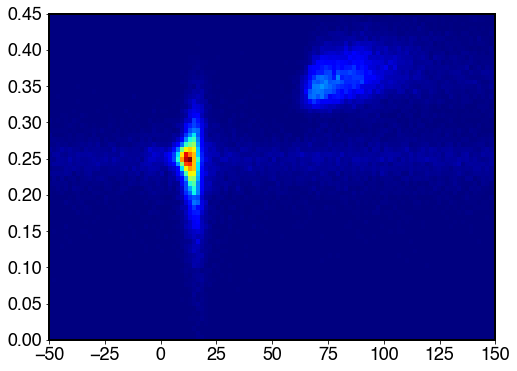

In [8]:
fig_pre_def()

plt.hist2d(singal_processed[:,0],singal_processed[:,1], bins=(400, 100),cmin=0, cmap=plt.cm.jet)
#ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
#ax.set_ylabel('PSD ',fontsize=18)
#fig_post_def( xlim = (-50,150),ylim=(0,0.45),xlabel='Time diff(ns)', ylabel = 'PSD')

plt.ylim(0.0,0.45)
plt.xlim(-50,150)


<Figure size 576x432 with 0 Axes>

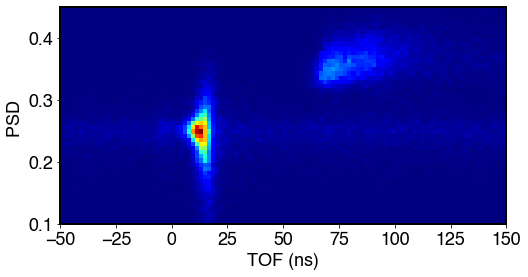

In [9]:
fig_pre_def()
fig = plt.figure(figsize=(8,4))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.hist2d(singal_processed[:,0], singal_processed[:,1], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_ylabel('PSD ',fontsize=18)

plt.ylim(0.1,0.45)
plt.xlim(-50,150)

plt.show()

## Time V.S Channel

<Figure size 576x432 with 0 Axes>

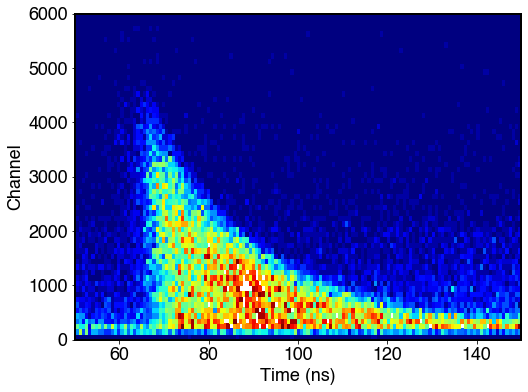

In [85]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.hist2d(singal_processed[:,0],singal_processed[:,2], bins=(1000, 100),cmin=0,cmax=30, cmap=plt.cm.jet)

ax.set_ylabel('Channel',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Time (ns)',fontsize=18)
plt.ylim(0,6000)
plt.xlim(50,150)
plt.show()

## Channel V.S PSD

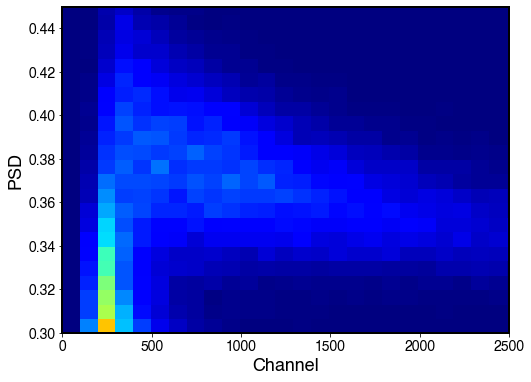

In [11]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.hist2d(singal_processed[:,2],singal_processed[:,1], bins=(100, 100),cmin=0, cmap=plt.cm.jet)

ax.set_ylabel('PSD',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Channel',fontsize=18)
plt.ylim(0.3,0.45)
plt.xlim(0,2500)
plt.show()

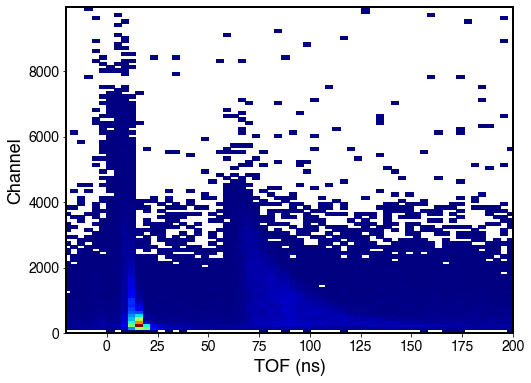

In [12]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

h=plt.hist2d(singal_processed[:,0],singal_processed[:,2], bins=(200, 100),cmin=1, cmap=plt.cm.jet)

ax.set_ylabel('Channel',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('TOF (ns)',fontsize=18)
plt.ylim(0,)
plt.xlim(-20,200)
plt.show()

h= plt.hist2d(x_2D, y_2D, bins=(200, 50),cmin=1, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(125,140,2):
    ax.plot(h[0][int(i)],label = str(i*4-400)+'ns' )

    
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Channel',fontsize=18)
plt.ylim(0,100)
plt.xlim(0,50)
plt.legend(fontsize = 18) 
plt.show()
 

In [13]:
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

In [14]:
bin_center, hist  = sorting(singal_processed[:,0],800,-400,400)
bin_center, hist_neutron = sorting(neutron_PSD[:,0],800,-400,400)

(0.0, 3047.1)

<Figure size 576x432 with 0 Axes>

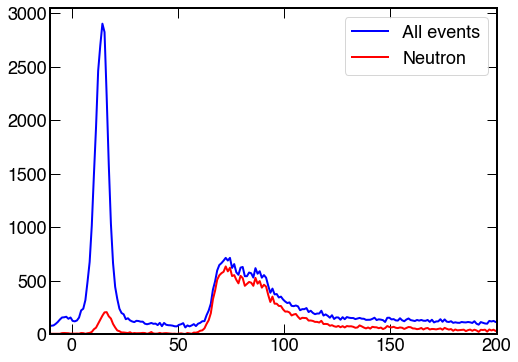

In [15]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.plot(bin_center,hist,'b',linewidth=2,label ='All events')
ax.plot(bin_center,hist_neutron,'r' ,linewidth=2,label ='Neutron')

fig_post_def()
plt.xlim(-10,200)
plt.ylim(0,)

# Time delay calibration

## Find the measure coincidence time 

In [30]:
max_position = np.argmax(hist)
measured_gamma_coincidence= bin_center[max_position]
print('measured coincidence time: ',measured_gamma_coincidence,' ns')

measured coincidence time:  14.5  ns


In [31]:
light_speed = 299792468 #m/s
nano_second = 10**(-9)  #s
gamma_to_1_cm_gamma_detector= (0.01/light_speed)/nano_second
print(gamma_to_3_cm_gamma_detector)

0.10006922522149556


In [32]:
gamma_to_200cm_nnutron_detector = (2 / 299792458 )*10**9
print(gamma_to_200cm_nnutron_detector,' ns')
ideal_gamma_coincidence = gamma_to_200cm_nnutron_detector - gamma_to_1_cm_gamma_detector
system_delay = measured_gamma_coincidence - ideal_gamma_coincidence
print('system_delay  ',system_delay)


6.671281903963041  ns
system_delay   7.8620745044441245


## Time Correction

In [33]:
Signal_processed_corrected = singal_processed.copy()
Signal_processed_corrected[:,0] = Signal_processed_corrected[:,0]-system_delay+gamma_to_3_cm_gamma_detector

neutron_PSD_Tdelay_corrected = neutron_PSD.copy()
neutron_PSD_Tdelay_corrected[:,0] = neutron_PSD_Tdelay_corrected[:,0]-system_delay+gamma_to_3_cm_gamma_detector

In [34]:
print('Time             PSD            channeel       source detector')
print(neutron_PSD_Tdelay_corrected)


Time             PSD            channeel       source detector
[[1.16957995e+02 3.76214000e-01 8.24000000e+02 6.00000000e+00]
 [7.97229947e+01 4.07143000e-01 5.60000000e+02 4.00000000e+00]
 [1.10299995e+02 3.79048000e-01 5.25000000e+02 6.00000000e+00]
 ...
 [5.51799472e+00 3.41216000e-01 2.96000000e+02 4.00000000e+00]
 [8.68059947e+01 4.12250000e-01 8.49000000e+02 6.00000000e+00]
 [6.93339947e+01 3.74088000e-01 5.48000000e+02 6.00000000e+00]]


#time resolution


## TOF distribution (Just for display)

In [35]:
#axis, hist_corr  = sorting(singal_processed[:,0]-system_delay+gamma_to_3_cm_gamma_detector,400,-400,400)
#axis, hist_neutron_corr = sorting(neutron_PSD[:,0]-system_delay+gamma_to_3_cm_gamma_detector,400,-400,400)
axis, hist_corr  = sorting(Signal_processed_corrected[:,0],800,-400,400)
axis, hist_neutron_corr = sorting(neutron_PSD_Tdelay_corrected[:,0],800,-400,400)

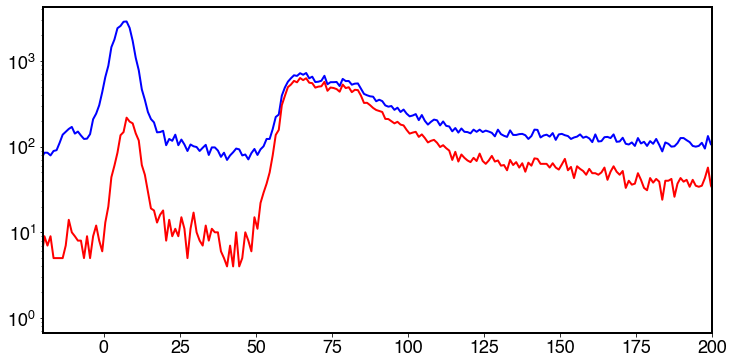

In [164]:
fig = fig_pre_def(12,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

ax.plot(axis, hist_corr  ,'b',linewidth=2,label ='All events')
ax.plot(axis, hist_neutron_corr,'r' ,linewidth=2,label ='Neutron')


#fig_post_def(xlim=(-20,250),ylim=(0,800), ylabel ='counts' ,xlabel='TOF (ns)')

plt.xlim(-20,200)
#plt.ylim(0,)
plt.yscale('log')

# correction: Channel to MeVee 

In [37]:
print(neutron_PSD_Tdelay_corrected)

[[1.16957995e+02 3.76214000e-01 8.24000000e+02 6.00000000e+00]
 [7.97229947e+01 4.07143000e-01 5.60000000e+02 4.00000000e+00]
 [1.10299995e+02 3.79048000e-01 5.25000000e+02 6.00000000e+00]
 ...
 [5.51799472e+00 3.41216000e-01 2.96000000e+02 4.00000000e+00]
 [8.68059947e+01 4.12250000e-01 8.49000000e+02 6.00000000e+00]
 [6.93339947e+01 3.74088000e-01 5.48000000e+02 6.00000000e+00]]


In [38]:
ChannelToLightoutput = 0.000619
neutron_PSD_Tdelay_LO_corrected = neutron_PSD_Tdelay_corrected.copy()
neutron_PSD_Tdelay_LO_corrected[:,2] = neutron_PSD_Tdelay_LO_corrected[:,2]*ChannelToLightoutput

In [39]:
print(neutron_PSD_Tdelay_LO_corrected)


[[116.95799472   0.376214     0.510056     6.        ]
 [ 79.72299472   0.407143     0.34664      4.        ]
 [110.29999472   0.379048     0.324975     6.        ]
 ...
 [  5.51799472   0.341216     0.183224     4.        ]
 [ 86.80599472   0.41225      0.525531     6.        ]
 [ 69.33399472   0.374088     0.339212     6.        ]]


# Spectrum calculation

In [29]:
Time_to_energy(70)

NameError: name 'Time_to_energy' is not defined

## Choose the time region and threshold

In [173]:
neutron_time_threshold_selected = [0,0,0,0]
selected_time_region = [30,150]
threshold = 0.125 #MeVee

for i in np.arange(0,len(neutron_PSD_Tdelay_LO_corrected[:,0]),1):
    if (    neutron_PSD_Tdelay_LO_corrected[i,0] > selected_time_region[0] 
        and neutron_PSD_Tdelay_LO_corrected[i,0] < selected_time_region[1] 
        and neutron_PSD_Tdelay_LO_corrected[i,2] > threshold):
        neutron_time_threshold_selected = np.vstack((neutron_time_threshold_selected,neutron_PSD_Tdelay_LO_corrected[i,:]))
        
neutron_time_threshold_selected =neutron_time_threshold_selected[1:]
    

In [174]:
print(neutron_time_threshold_selected)
print(len(neutron_time_threshold_selected[:,0]))

[[116.95799472   0.376214     0.510056     6.        ]
 [ 79.72299472   0.407143     0.34664      4.        ]
 [110.29999472   0.379048     0.324975     6.        ]
 ...
 [ 80.61399472   0.393715     0.334879     4.        ]
 [ 86.80599472   0.41225      0.525531     6.        ]
 [ 69.33399472   0.374088     0.339212     6.        ]]
21598


## correction: time to energy

In [175]:
Time_to_energy(50)
E = 0.5*1.64749*10**-27*

SyntaxError: invalid syntax (<ipython-input-175-c973ce247d17>, line 2)

In [176]:
# Time to energy
def Time_to_energy(TOF):
    distance = 2 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy


def Energy_to_time(E):
    distance = 1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy

In [45]:
print(np.round(neutron_E_threshold_selected[:,0],2))

NameError: name 'neutron_E_threshold_selected' is not defined

In [147]:
resolution_time =0.001 #ns

neutron_E_threshold_selected = neutron_time_threshold_selected.copy()
neutron_E_threshold_selected[:,0] = Time_to_energy(np.round(neutron_E_threshold_selected[:,0]/resolution_time)*resolution_time  )

print(neutron_E_threshold_selected)

[[1.50915647 0.376214   0.510056   6.        ]
 [3.25726984 0.407143   0.34664    4.        ]
 [1.69736534 0.379048   0.324975   6.        ]
 ...
 [3.18529457 0.393715   0.334879   4.        ]
 [2.74512648 0.41225    0.525531   6.        ]
 [4.31388681 0.374088   0.339212   6.        ]]


## plot spectrum without efficiency correction

In [148]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 10 # 10 MeV
Binning = 100 # cut to 100 pieces
Neutron_E_axis, Neutron_energy_counts = sorting(
    neutron_E_threshold_selected[:,0], Binning , Neutron_energy_lower, Neutron_energy_upper)

(0.0, 657.3)

<Figure size 576x432 with 0 Axes>

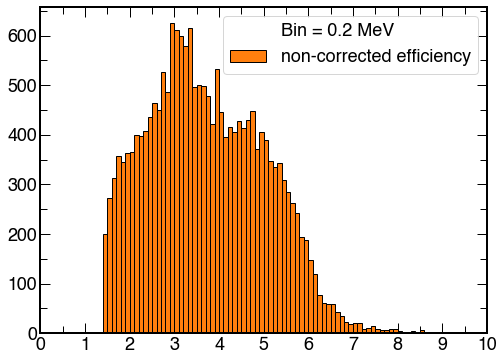

In [178]:

fig_pre_def()

fig = fig_pre_def() # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 0.2 MeV')
#ax.bar(Neutron_E_axis, Neutron_energy_counts, label= 'non-corrected efficiency')
ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'non-corrected efficiency')
fig_post_def(x_ma=1,x_mi=0.5,y_ma=100,y_mi=50)

plt.xlim(0,10)
plt.ylim(0,)

## efficiency correction

In [192]:
efficiency = np.loadtxt('../detection_efficiency/3"EJ309_150cm/output/20220211_efficiency.txt')

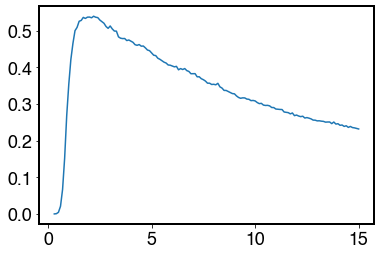

In [193]:
plt.plot(efficiency[:,0],efficiency[:,1])

In [194]:
axis_neutron_noncor, hist_neutron_noncor = sorting(neutron_E_threshold_selected[:,0],100,0,10)

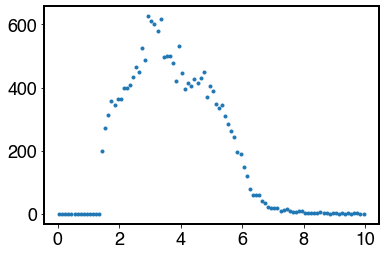

In [195]:
plt.plot(axis_neutron_noncor, hist_neutron_noncor,'.' )

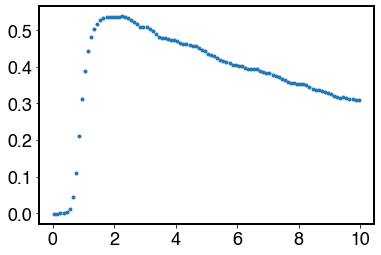

In [183]:
interpolation_func  = interp1d(efficiency[:,0],efficiency[:,1],fill_value="extrapolate") 
efficiency_corrected_yaxis = interpolation_func(axis_neutron_noncor)
plt.plot(axis_neutron_noncor,efficiency_corrected_yaxis,'.')

In [184]:
#neutron_spectrum = hist_neutron_noncor/efficiency_corrected_yaxis

In [185]:
efficiency_corrected_yaxis[7]

0.10969111388754114

In [196]:
neutron_spectrum=[]
for i in np.arange(0,len(hist_neutron_noncor),1):
    if i < 5:
        print(i)
        neutron_spectrum = np.append(neutron_spectrum,0)
    else:
        #print(i)
        neutron_spectrum = np.append(neutron_spectrum,hist_neutron_noncor[i]/efficiency_corrected_yaxis[i])

0
1
2
3
4


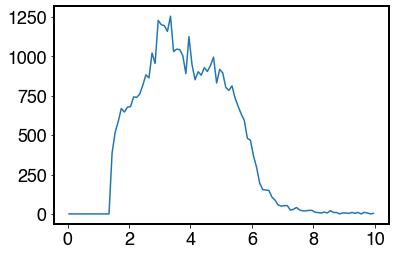

In [197]:
plt.plot(axis_neutron_noncor,neutron_spectrum)

(0.0, 1.05)

<Figure size 576x432 with 0 Axes>

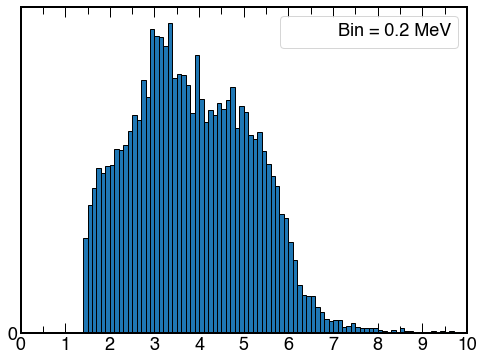

In [198]:
fig_pre_def()

fig = fig_pre_def() # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 0.2 MeV')
#ax.bar(Neutron_E_axis, Neutron_energy_counts, label= 'non-corrected efficiency')
plt.bar(axis_neutron_noncor,neutron_spectrum/neutron_spectrum.max(),width=0.1,edgecolor = "k")
#plt.plot(Neutron_E_axis, Neutron_energy_counts/Neutron_energy_counts.max(),'-')
fig_post_def(x_ma=1,x_mi=0.5,y_ma=200,y_mi=100)

plt.xlim(0,10)
plt.ylim(0,)

(0.0, 657.3)

<Figure size 576x432 with 0 Axes>

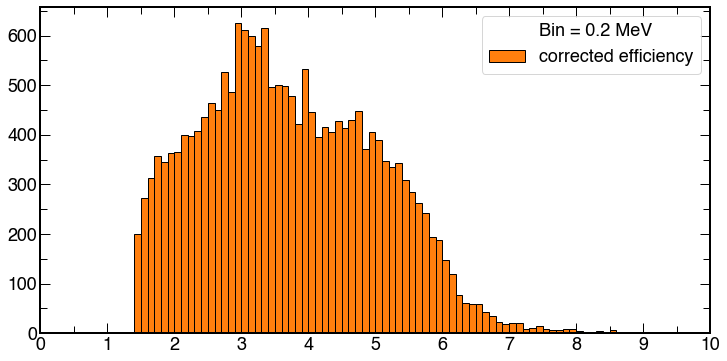

In [199]:

fig_pre_def()

fig = fig_pre_def(12,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 0.2 MeV')

ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'corrected efficiency')

fig_post_def(x_ma=1,x_mi=0.5,y_ma=100,y_mi=50)

plt.xlim(0,10)
plt.ylim(0,)

In [200]:
ISO_spectrum = np.loadtxt('Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('Neutron_spectrum/Scherzinger_2015.txt')

(0.0, 1.2)

<Figure size 576x432 with 0 Axes>

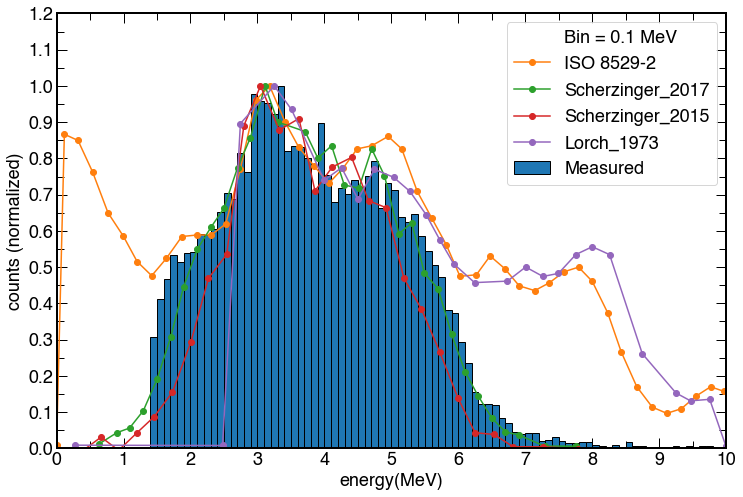

In [203]:

fig_pre_def()

fig = fig_pre_def(12,8,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 


ax.plot([],[] ,' ', label= 'Bin = 0.1 MeV')

#ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'TOF measured')
plt.bar(axis_neutron_noncor,neutron_spectrum/neutron_spectrum.max(),width=0.1,edgecolor = "k", label= 'Measured')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger_2017')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger_2015')
plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch_1973')

fig_post_def(x_ma=1,x_mi=0.5,y_ma=0.1,y_mi=0.05,xlabel='energy(MeV)',ylabel='counts (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(0,1.2)

# considering the time resolution

In [288]:
testlist = np.array((0.9,1.2,3.5,4,4.9,5.1,5.7,6.6,6))
print(testlist)

[0.9 1.2 3.5 4.  4.9 5.1 5.7 6.6 6. ]


In [289]:
testlist_2 = np.round(testlist/2)*2
print(testlist_2)

[0. 2. 4. 4. 4. 6. 6. 6. 6.]


In [68]:
resolution_time = 2 #ns

neutron_E_threshold_selected_time = neutron_time_threshold_selected.copy()
neutron_E_threshold_selected_time[:,0] = np.round(neutron_E_threshold_selected_time[:,0]/resolution_time)*resolution_time  
#print(neutron_E_threshold_selected_time)
Neutron_t_axis, Neutron_t_counts=sorting(
    neutron_E_threshold_selected_time[:,0], int(100/resolution_time) , 1, 101)


In [69]:
for i in np.arange(0,len(Neutron_t_axis),1):
    #print(i, Time_to_energy(Neutron_t_axis[i]))
    if Time_to_energy(Neutron_t_axis[i]) <10 :
        cut_point = i
        break
print(i, Time_to_energy(Neutron_t_axis[i]))

22 9.888604153399498


<ipython-input-53-17963ce5802b>:12: RuntimeWarning: invalid value encountered in double_scalars
  neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)


(0.0, 10.0)

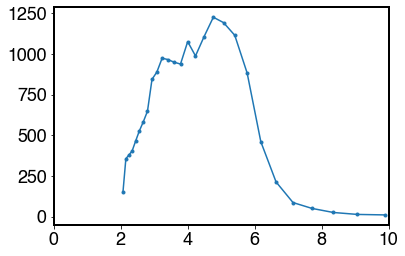

In [70]:
Neutron_E_axis = Time_to_energy(Neutron_t_axis[cut_point:])
plt.plot(Neutron_E_axis,Neutron_t_counts[cut_point:],'.-')
plt.xlim(0,10)
#print(Neutron_E_axis_2ns)

In [71]:
#print(Neutron_E_axis)

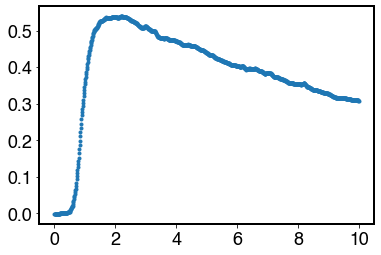

In [72]:
efficiency_for_time = np.arange(0,10,0.01)

interpolation_func  = interp1d(efficiency[:,0],efficiency[:,1],fill_value="extrapolate") 
efficiency_corrected_yaxis_for_t = interpolation_func(efficiency_for_time)
plt.plot(efficiency_for_time,efficiency_corrected_yaxis_for_t,'.')

In [73]:
efficiency_E_axis = np.round(Neutron_E_axis,2)

efficiency_E_x_axis_selected = efficiency_E_axis*100
efficiency_E_x_axis_selected = efficiency_E_x_axis_selected.astype(int)
print(len(efficiency_E_x_axis_selected))
#plt.plot(efficiency_E_x_axis_selected)

28


In [74]:
efficiency_E_selected = efficiency_corrected_yaxis_for_t[efficiency_E_x_axis_selected]
print(len(efficiency_E_selected))

28


In [75]:
Neutron_counts_time_selected= Neutron_t_counts[cut_point:]/efficiency_E_selected

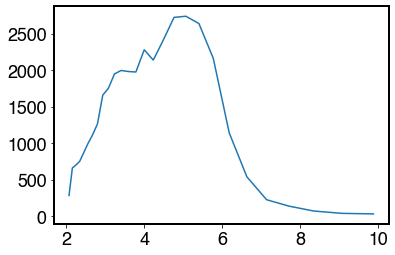

In [76]:
plt.plot(Neutron_E_axis,Neutron_counts_time_selected)

In [77]:
def draw_bar_plotNeutron_E_axis


SyntaxError: invalid syntax (<ipython-input-77-8c8e53f24c37>, line 1)

In [78]:
test= np.array((0,1,2,3,4))
print(len(test))

5


In [79]:
print(len(Neutron_E_axis))

28


In [80]:
Neutron_E_axis_length=[]
for i in np.arange(0,len(Neutron_E_axis),1):
    #print(i,'total')
    if int(i) == 0:
        #print(i,'first')
        Neutron_E_axis_length = np.append(Neutron_E_axis_length,Neutron_E_axis[i]-Neutron_E_axis[i+1])
        
    elif i == len(Neutron_E_axis)-1:
        #print(i, 'here')
        Neutron_E_axis_length = np.append(Neutron_E_axis_length,Neutron_E_axis[i-1]-Neutron_E_axis[i])
        
    else:
        #print(i)
        half_pre_length   = (Neutron_E_axis[i-1]-Neutron_E_axis[i])/2
        half_after_length = (Neutron_E_axis[i]-Neutron_E_axis[i+1])/2
        Neutron_E_axis_length = np.append(Neutron_E_axis_length,half_pre_length+half_after_length)
    
print(Neutron_E_axis_length)

[0.81878508 0.76975594 0.67925483 0.60246118 0.53686517 0.48049075
 0.43176738 0.38943585 0.35247837 0.32006616 0.29151959 0.2662777
 0.24387468 0.22392153 0.20609161 0.19010928 0.17574085 0.16278728
 0.1510783  0.14046772 0.1308295  0.1220546  0.11404833 0.10672823
 0.10002223 0.0938672  0.08820761 0.08549519]


<BarContainer object of 28 artists>

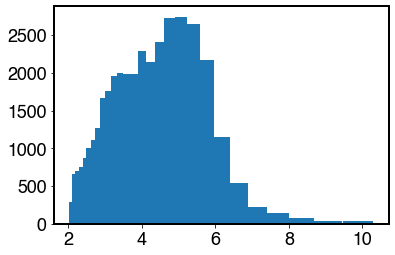

In [81]:
plt.bar(Neutron_E_axis,Neutron_counts_time_selected,Neutron_E_axis_length,)

In [82]:
Neutron_counts_xlength_normalized = Neutron_counts_time_selected/Neutron_E_axis_length

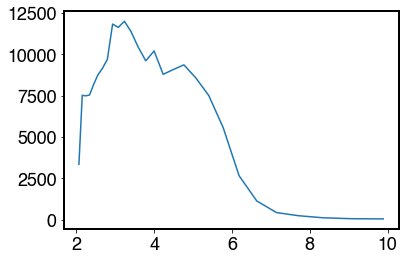

In [83]:
plt.plot(Neutron_E_axis,Neutron_counts_xlength_normalized)

(0.0, 1.0502821004176988)

<Figure size 576x432 with 0 Axes>

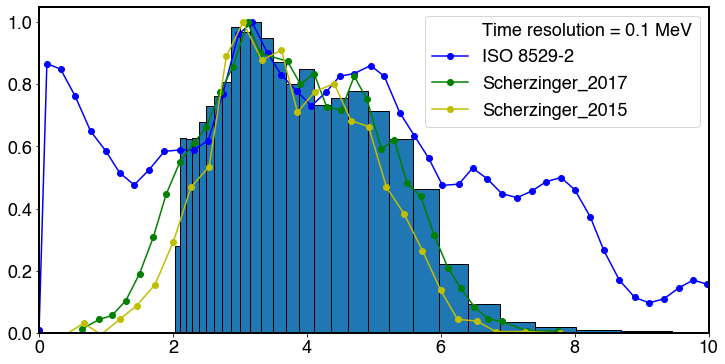

In [84]:

fig_pre_def()

fig = fig_pre_def(12,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Time resolution = 0.1 MeV')

#ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'TOF measured')
#plt.plot(Neutron_E_axis,Neutron_counts_xlength_normalized/Neutron_counts_xlength_normalized.max(),'o-r')
plt.bar(Neutron_E_axis,Neutron_counts_xlength_normalized/Neutron_counts_xlength_normalized.max(),Neutron_E_axis_length,edgecolor = "k")
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-b',label='ISO 8529-2')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger_2017')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-y',label='Scherzinger_2015')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch_1973')

#fig_post_def(x_ma=1,x_mi=0.5,y_ma=100,y_mi=50,xlabel='energy(MeV)',ylabel='counts (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(0,)

In [452]:
# sorting the time to 2 ns

neutron_E_threshold_selected_2ns = neutron_time_threshold_selected.copy()
neutron_E_threshold_selected_2ns[:,0] = np.round(neutron_E_threshold_selected_2ns[:,0]/2)*2  
print(neutron_E_threshold_selected_2ns)


[[46.        0.360825  1.320946  4.      ]
 [44.        0.36736   0.982353  4.      ]
 [70.        0.368902  0.203032  6.      ]
 ...
 [66.        0.383333  0.22284   6.      ]
 [68.        0.364148  0.770036  6.      ]
 [46.        0.355892  0.777464  6.      ]]


In [307]:
Neutron_t_axis_2ns, Neutron_t_counts_2ns=sorting(
    neutron_E_threshold_selected_2ns[:,0], 50 , 1, 101)
print(Neutron_t_axis_2ns)
print(Neutron_t_counts_2ns)

[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100.]
[   0    0    0    0    0    0    0    0    0    5   18    5    2    5
    3    5    7   24   61  168  439  729  953 1057 1008  923  845  806
  856  798  709  566  404  377  318  294  244  206  192  168  140  116
   86   78   70   75   63   64   55   33]


[9.06981907 8.12794075 7.3260301  6.63757908 6.04208842 5.5235
 5.06908756 4.66865847 4.31397035 3.99829902 3.71611426 3.46283371
 3.2346341  3.02830499 2.84113437 2.67081849 2.51539021 2.37316153
 2.24267737 2.12267798 2.01206826 1.90989258 1.81531398 1.72759688
 1.64609272 1.57022782 1.4994933  1.43343644 1.37165342 1.3137831
 1.25950171 1.20851834 1.16057095]


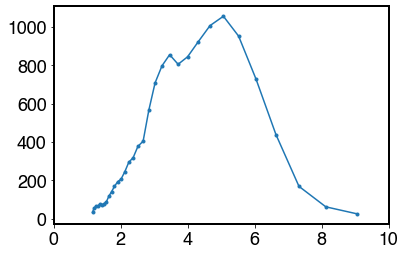

In [334]:
Neutron_E_axis_2ns = Time_to_energy(Neutron_t_axis_2ns[17:])
plt.plot(Neutron_E_axis_2ns,Neutron_t_counts_2ns[17:],'.-')
plt.xlim(0,10)
print(Neutron_E_axis_2ns)

In [335]:
efficiency_for_time = np.arange(0,10,0.1)
print(efficiency_for_time)
interpolation_func  = interp1d(efficiency[:,0],efficiency[:,1],fill_value="extrapolate") 
efficiency_corrected_yaxis_for_t = interpolation_func(efficiency_for_time)
print(efficiency_corrected_yaxis_for_t)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[-1.81356172e-03 -1.18657125e-03 -5.59580774e-04  6.74097006e-05
  6.94400176e-04  4.43399015e-03  2.09506525e-02  6.69108557e-02
  1.52471372e-01  2.68564142e-01  3.53869751e-01  4.21208258e-01
  4.65186021e-01  4.99969702e-01  5.08962863e-01  5.25654626e-01
  5.28005146e-01  5.36222016e-01  5.33377268e-01  5.36872804e-01
  5.37170651e-01  5.35183195e-01  5.39380305e-01  5.36688323e-01
  5.35675636e-01  5.29022992e-01  5.24603379e-01  5.20182417e-01
  5.11341207e-01  5.06385961e-01  5.12799347e-01  5.04832763e-01
  4.99074938e-01  4.98684926e-01  4.83175728e-01  4.79497781e-01
  4.7840

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
0.5127993474512266
0.43921862710544607


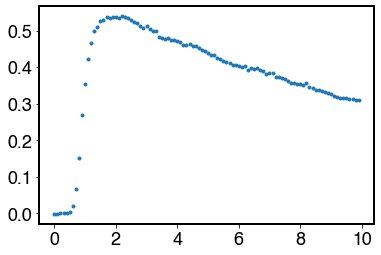

In [355]:
plt.plot(efficiency_for_time,efficiency_corrected_yaxis_for_t,'.')
print(efficiency_for_time)
print(efficiency_corrected_yaxis_for_t[30])
print(efficiency_corrected_yaxis_for_t[50])

In [341]:
efficiency_2ns_x_axis = np.round(Neutron_E_axis_2ns,1)
print(efficiency_2ns_x_axis)
efficiency_2ns_x_axis_selected = efficiency_2ns_x_axis*10
efficiency_2ns_x_axis_selected = efficiency_2ns_x_axis_selected.astype(int)
print(efficiency_2ns_x_axis_selected)

[9.1 8.1 7.3 6.6 6.  5.5 5.1 4.7 4.3 4.  3.7 3.5 3.2 3.  2.8 2.7 2.5 2.4
 2.2 2.1 2.  1.9 1.8 1.7 1.6 1.6 1.5 1.4 1.4 1.3 1.3 1.2 1.2]
[91 81 73 66 60 55 51 47 43 40 37 35 32 30 28 27 25 24 22 21 20 19 18 17
 16 16 15 14 14 13 13 12 12]


In [342]:
efficiency_2ns = efficiency_corrected_yaxis_for_t[efficiency_2ns_x_axis_selected]
print(efficiency_2ns)

[0.32198329 0.3523546  0.37428468 0.39665409 0.40354047 0.41794871
 0.43310766 0.45305381 0.46007761 0.47137359 0.47867122 0.47949778
 0.49907494 0.51279935 0.51134121 0.52018242 0.52902299 0.53567564
 0.53938031 0.53518319 0.53717065 0.5368728  0.53337727 0.53622202
 0.52800515 0.52800515 0.52565463 0.50896286 0.50896286 0.4999697
 0.4999697  0.46518602 0.46518602]


In [344]:
Neutron_counts_2ns= Neutron_t_counts_2ns[17:]*efficiency_2ns

In [353]:
print(Neutron_E_axis_2ns)
print(Neutron_counts_2ns/Neutron_counts_2ns.max())
print(Neutron_t_counts_2ns)
print(efficiency_2ns)

[9.06981907 8.12794075 7.3260301  6.63757908 6.04208842 5.5235
 5.06908756 4.66865847 4.31397035 3.99829902 3.71611426 3.46283371
 3.2346341  3.02830499 2.84113437 2.67081849 2.51539021 2.37316153
 2.24267737 2.12267798 2.01206826 1.90989258 1.81531398 1.72759688
 1.64609272 1.57022782 1.4994933  1.43343644 1.37165342 1.3137831
 1.25950171 1.20851834 1.16057095]
[0.01688005 0.04695036 0.13735374 0.38036942 0.64260452 0.87005165
 1.         0.997561   0.92760258 0.87006381 0.84275533 0.89658096
 0.86995703 0.79418713 0.63220273 0.45905654 0.43565735 0.37209871
 0.34639496 0.28524723 0.24171781 0.22516546 0.195737   0.16398413
 0.1337905  0.09918951 0.08956209 0.07782395 0.08338281 0.06880395
 0.06989608 0.05588799 0.03353279]
[   0    0    0    0    0    0    0    0    0    5   18    5    2    5
    3    5    7   24   61  168  439  729  953 1057 1008  923  845  806
  856  798  709  566  404  377  318  294  244  206  192  168  140  116
   86   78   70   75   63   64   55   33]
[0.3219832

(0.0, 1.0502821004176988)

<Figure size 576x432 with 0 Axes>

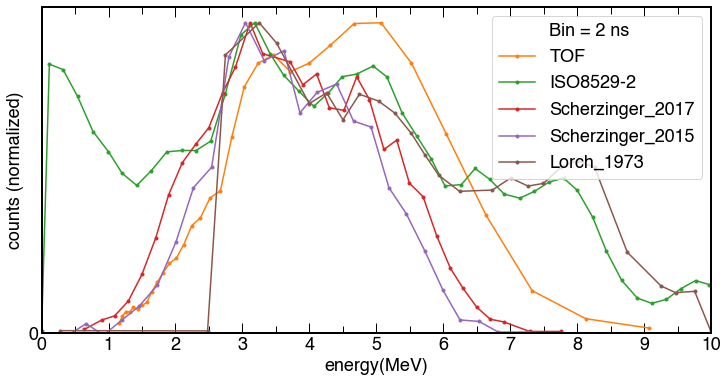

In [350]:

fig_pre_def()

fig = fig_pre_def(12,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 2 ns')

plt.plot(Neutron_E_axis_2ns,Neutron_counts_2ns[:]/Neutron_counts_2ns.max(),'.-',label='')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'.-',label='ISO8529-2')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'.-',label='Scherzinger_2017')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'.-',label='Scherzinger_2015')
plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'.-',label='Lorch_1973')
fig_post_def(x_ma=1,x_mi=0.5,y_ma=100,y_mi=50,xlabel='energy(MeV)',ylabel='counts (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(0,)

In [ ]:
Neutron_E_axis_2ns



In [312]:
# sorting the time to 1 ns

neutron_E_threshold_selected_1ns = neutron_time_threshold_selected.copy()
neutron_E_threshold_selected_1ns[:,0] = np.round(neutron_E_threshold_selected_1ns[:,0])
print(neutron_E_threshold_selected_1ns)
Neutron_t_axis_1ns, Neutron_t_counts_1ns=sorting(
    neutron_E_threshold_selected_1ns[:,0], 50 , 1, 101)
print(Neutron_t_axis_1ns)
print(Neutron_t_counts_1ns)


[[46.        0.360825  1.320946  4.      ]
 [45.        0.36736   0.982353  4.      ]
 [70.        0.368902  0.203032  6.      ]
 ...
 [66.        0.383333  0.22284   6.      ]
 [69.        0.364148  0.770036  6.      ]
 [46.        0.355892  0.777464  6.      ]]
[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100.]
[   0    0    0    0    0    0    0    0    0    3   15   10    0    6
    3    5    5   20   44  136  347  680  889 1079 1025  931  871  809
  828  807  764  580  445  382  328  315  253  216  196  160  155  115
   94   77   78   76   58   67   60   43]


[37.96781878 30.39416853 24.90409503 20.79120591 17.62710171 15.13894273
 13.14591286 11.52415782 10.18643883  9.06981907  8.12794075  7.3260301
  6.63757908  6.04208842  5.5235      5.06908756  4.66865847  4.31397035
  3.99829902  3.71611426  3.46283371  3.2346341   3.02830499  2.84113437
  2.67081849  2.51539021  2.37316153  2.24267737  2.12267798  2.01206826
  1.90989258  1.81531398  1.72759688  1.64609272  1.57022782  1.4994933
  1.43343644  1.37165342  1.3137831   1.25950171  1.20851834  1.16057095]


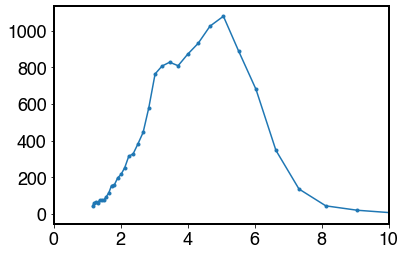

In [315]:
Neutron_E_axis_1ns = Time_to_energy(Neutron_t_axis_1ns[8:])
plt.plot(Neutron_E_axis_1ns,Neutron_t_counts_1ns[8:],'.-')
plt.xlim(0,10)
print(Neutron_E_axis_1ns)

(0.0, 1.0502821004176988)

<Figure size 576x432 with 0 Axes>

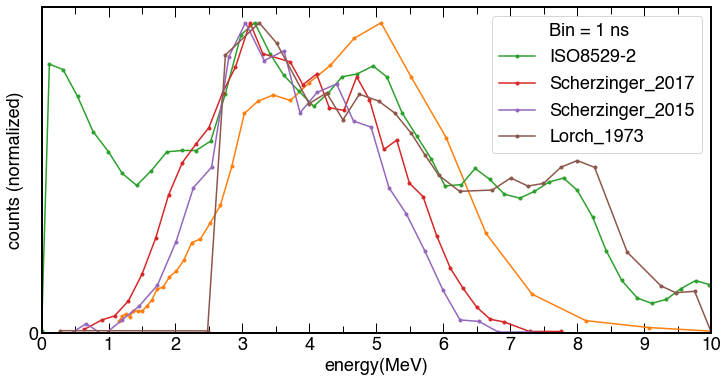

In [317]:

fig_pre_def()

fig = fig_pre_def(12,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 1 ns')

plt.plot(Neutron_E_axis_1ns,Neutron_t_counts_1ns[8:]/Neutron_t_counts_1ns.max(),'.-')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'.-',label='ISO8529-2')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'.-',label='Scherzinger_2017')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'.-',label='Scherzinger_2015')
plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'.-',label='Lorch_1973')
fig_post_def(x_ma=1,x_mi=0.5,y_ma=100,y_mi=50,xlabel='energy(MeV)',ylabel='counts (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(0,)

# Extract the certain response function at certain energy 

In [222]:
print(Time_to_energy(72))
print(Time_to_energy(76))
print(Time_to_energy(80))

2.242677371098682
2.012068260034739
1.8153139804811806


In [223]:
neutron_PSD_region =[0,0,0,0]

for i in np.arange(0,len(neutron_PSD_corrected[:,0]),1):
     if neutron_PSD_corrected[i,0] < 80 and neutron_PSD_corrected[i,0]>72:
            neutron_PSD_region = np.vstack((neutron_PSD_region,neutron_PSD_corrected[i,:]))


In [224]:
print(neutron_PSD_region)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.29414614e+01 3.84232000e-01 1.20500000e+03 4.00000000e+00]
 [7.30024614e+01 3.86014000e-01 7.15000000e+02 4.00000000e+00]
 ...
 [7.54394614e+01 3.53434000e-01 5.97000000e+02 6.00000000e+00]
 [7.78754614e+01 3.71041000e-01 4.42000000e+02 4.00000000e+00]
 [7.63194614e+01 4.60606000e-01 3.30000000e+02 4.00000000e+00]]


In [225]:
axis, hist_neutron_region_corr = sorting(neutron_PSD_region[:,2],1000,0,10000)

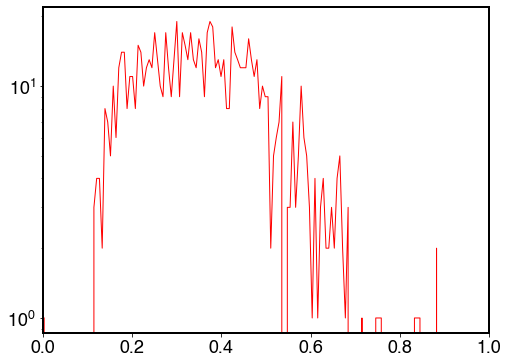

In [226]:
fig = fig_pre_def() # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111


ax.plot(axis*0.000619, hist_neutron_region_corr,'r' ,linewidth=1,label ='Neutron')


#fig_post_def(xlim=(-20,200),ylim=(0,700), ylabel ='counts' ,xlabel='TOF (ns)')
plt.xlim(0,1)
#plt.xlim(-20,200)
#plt.ylim(0,)
plt.yscale('log')

In [214]:
path = r'../detection_efficiency/3"EJ309_150cm/output/20220213_3inches_neutron_response_function.xlsx'

simulated_response=(pd.read_excel(path, sheet_name = 'response_function', index_col=None,header=0, engine = 'openpyxl')).values


In [218]:
#energy = round(i/10+0.2,1)
e = 2
response_energy = int((e-0.2)*10)


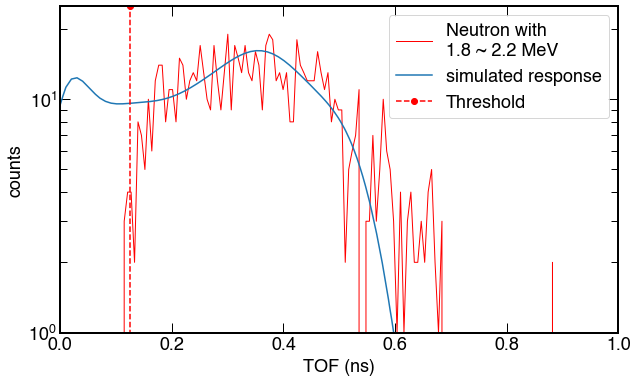

In [248]:


fig = fig_pre_def(10,6) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111


ax.plot(axis*0.000619, hist_neutron_region_corr,'r' ,linewidth=1,label ='Neutron with\n1.8 ~ 2.2 MeV')
ax.plot(simulated_response[:,0], simulated_response[:,response_energy]*6500,label='simulated response')
plt.plot([0.125, 0.125], [0, 25],'--r', marker = 'o',label='Threshold')

fig_post_def(ylabel ='counts' ,xlabel='TOF (ns)')
plt.xlim(0,1)
#plt.xlim(-20,200)
plt.ylim(1,25)
plt.yscale('log')

In [137]:
print(Time_to_energy(50))

4.66865846839568


In [138]:
E_axis = Time_to_energy(axis[410:500])

ValueError: x and y must have same first dimension, but have shapes (1,) and (400,)

<Figure size 576x432 with 0 Axes>

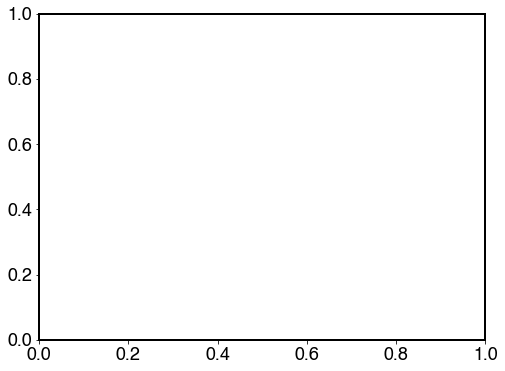

In [139]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


plt.plot(E_axis,hist_neutron_corr,'b',label = '')
plt.xlim(0,15)

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線

ax.set_xlabel('Energy (MeV)',fontsize=18)
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離

In [621]:
folder = "processed_TOF_data/D150cm_d5cm_320ns_Threshold_50_35/"
neutron_signal_5035_1 =np.loadtxt(folder+"20220103_TOF_TH50_D150d5cm_N_woPSD_g1g2_wPSD_12hours.txt")

neutron_signal_5035 = np.zeros(shape=4)
print(neutron_signal_5035)
for i in range(1,2):
    add = locals()["neutron_signal_5035_"+str(i)]  # convert string to variable name
    neutron_signal_5035=np.vstack((neutron_signal_5035,add))


print("time differnet   PSD.        Energy       trigger_channel")
print(neutron_signal_5035)
print(len(neutron_signal_5035))
print(neutron_signal_5035.shape)



[0. 0. 0. 0.]
time differnet   PSD.        Energy       trigger_channel
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 3.15203e+02  2.43003e-01  7.86000e+02  6.00000e+00]
 [-2.99900e+00  2.53240e-01  1.00300e+03  6.00000e+00]
 ...
 [ 1.72320e+01  1.81102e-01  2.54000e+02  4.00000e+00]
 [ 8.36080e+01  2.43049e-01  7.66100e+03  4.00000e+00]
 [ 3.01592e+02  2.40180e-01  8.91000e+02  6.00000e+00]]
1178
(1178, 4)


In [ ]:
#Signal processing

singal_processed = neutron_signal[neutron_signal[:,2]<10000]

neutron_signal_temp = singal_processed[singal_processed[:,1]<0.5]
neutron_PSD = neutron_signal_temp[neutron_signal_temp[:,1]>0.3]
print(singal_processed.shape)
print(neutron_PSD.shape)

In [ ]:
neutron_signal_8

In [624]:
hist_8050, bin_center_8050 = sorting(neutron_signal_8[:,0],400,-400,400)
hist_5035, bin_center_5035 = sorting(neutron_signal_5035[:,0],400,-400,400)
#hist_neutron, bin_center = sorting(neutron_PSD[:,0],400,-400,400)

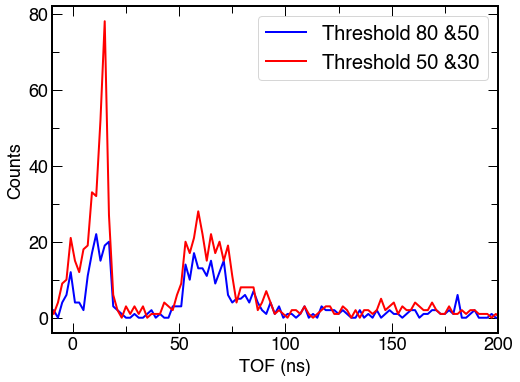

In [639]:
fig_pre_def()

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.plot(bin_center_8050,hist_8050,'b',linewidth=2,label ='Threshold 80 &50')
ax.plot(bin_center_5035,hist_5035,'r' ,linewidth=2,label ='Threshold 50 &30')


    # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線

ax.set_xlabel('TOF (ns)',fontsize=18)
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離
plt.xlim(-10,200)
plt.legend(fontsize =20)

In [493]:
bin_number=400    #切幾格
bin_width=2    #每格大小
hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    x_2D, #要分析的矩陣
    bins=bin_number, 
    range=(-400, 400), #範圍
    density=False) #是否Normalized成百分比

pr=400-2
print(edges[pr],edges[pr+1],hist[pr])

#print(len(hist),len(edges))
#print(hist)
#print(edges)
#print(edges[3])

In [494]:
Bin_center = []
for i in range(len(edges)-1):
    #print(i)
    Bin_center_single = round((edges[i]+edges[i+1])/2,2)
    Bin_center = np.append(Bin_center,Bin_center_single)
#print(Bin_center)

plt.plot(Bin_center,hist,'.')
plt.xlim(-5,10)
#plt.yscale('log')

(-10.0, 200.0)

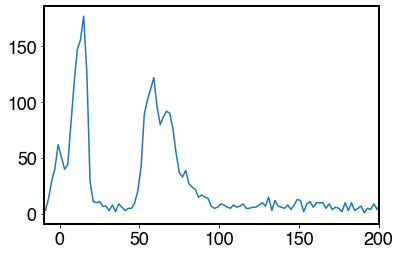

In [495]:
plt.plot(Bin_center,hist)
plt.xlim(-10,200)

In [386]:
hist1=hist

(-10.0, 200.0)

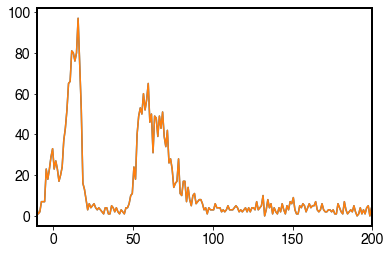

In [387]:
plt.plot(Bin_center,hist1)
plt.plot(Bin_center,hist)
plt.xlim(-10,200)

In [286]:
print(sum(hist[225:275]))
print(sum(hist1[225:275]))

206
337


In [289]:
print(sum(hist[200:210]))
print(sum(hist1[200:210]))

140
281


In [79]:
neutron_signal_n =np.loadtxt("20211222_TOF_N_wPSD_g1g2_wPSD.txt")

In [81]:
x_2D_n=np.array([])
y_2D_n=np.array([])
z_2D_n=np.array([])
for i in range(len(neutron_signal_n[:]) ):
    x_2D_n = np.append(x_2D_n,int(neutron_signal_n[i][0]))
    y_2D_n = np.append(y_2D_n,round(neutron_signal_n[i][1],4))
    z_2D_n = np.append(z_2D_n,int(neutron_signal_n[i][2]))

In [97]:
bin_number=400    #切幾格
bin_width=1    #每格大小
hist_n, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    x_2D_n, #要分析的矩陣
    bins=bin_number, 
    range=(-400, 400), #範圍
    density=False) #是否Normalized成百分比

In [98]:
Bin_center = []
for i in range(len(edges)-1):
    #print(i)
    Bin_center_single = round((edges[i]+edges[i+1])/2,2)
    Bin_center = np.append(Bin_center,Bin_center_single)
#print(Bin_center)

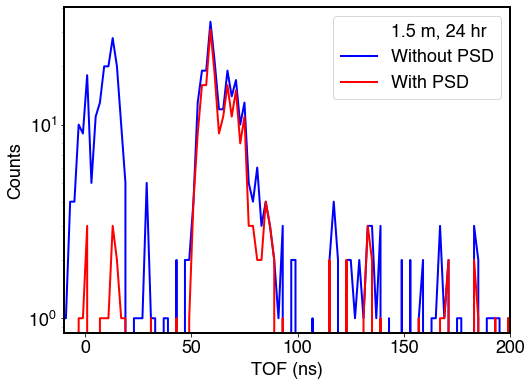

In [118]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=18)          # X軸數字的文字大小
plt.rc('ytick', labelsize=18)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot([],[],' ',label = '1.5 m, 24 hr')
plt.plot(Bin_center,hist,'b',linewidth=2,label = 'Without PSD')
plt.plot(Bin_center,hist_n,'r',linewidth=2,label = 'With PSD')


ax.set_xlabel('TOF (ns)',fontsize=18)
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離
#plt.ylim(0,)
plt.xlim(-10,200)
plt.legend(fontsize=18)
plt.yscale('log')
plt.show()





In [3]:
g1_PSD     =np.array([])
g1_TOF     =np.array([])
g1_charge  =np.array([])
g2_PSD     =np.array([])
g2_TOF     =np.array([])
g2_charge  =np.array([])

In [24]:

for i in range(1000):
    g1_PSD     =np.append(g1_PSD,    random.uniform(0.1,0.3))
    g1_TOF     =np.append(g1_TOF,    random.uniform(-10,10))
    g1_charge  =np.append(g1_charge, random.uniform(0,1000))
    
    g2_PSD     =np.append(g2_PSD, random.uniform(0.4,0.5))
    g2_TOF     =np.append(g2_TOF, random.uniform(100,100))
    g2_charge  =np.append(g2_charge, random.uniform(0,1000))

In [4]:

g1_PSD     = np.random.normal(0.2,0.05,1000)
#g1_TOF     = np.random.normal(0,50,1000)

g2_PSD     = np.random.normal(0.5,0.02,1000)
g2_TOF     = np.random.normal(100,5,1000)
for i in range(1000):
    g1_TOF     =np.append(g1_TOF, random.uniform(0,120))
    g1_charge  =np.append(g1_charge, random.uniform(0,1000))
    g2_charge  =np.append(g2_charge, random.uniform(0,1000))

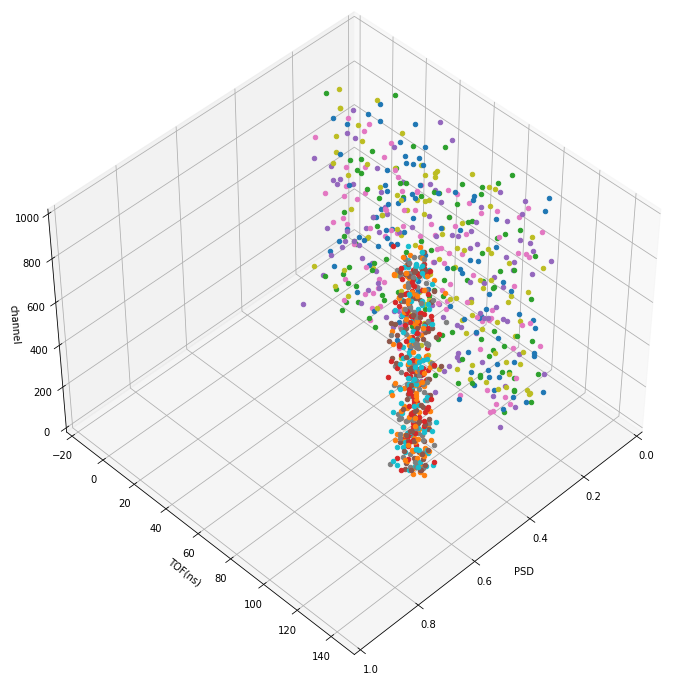

In [17]:
from matplotlib import interactive
interactive(True)


fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(projection='3d')

for i in range(500):
    ax.scatter(g1_PSD[i], g1_TOF[i], g1_charge[i])
    ax.scatter(g2_PSD[i], g2_TOF[i], g2_charge[i])

#ax.set_adjustable('box')
ax.set_xlim3d(0,1)
ax.set_ylim3d(-20,150)
ax.set_zlim3d(0,1000)

#ax.set_xticks(0,1)
ax.set_xlabel('PSD')
ax.set_ylabel('TOF(ns)')
ax.set_zlabel('channel')
ax.view_init(45, 45)
 
plt.show()